In [1]:
!pip install scikit-learn-extra
!pip install --upgrade threadpoolctl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.drop(["CustomerID"], axis = 1, inplace=True)
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
features = df[["Age", "Annual Income (k$)"]]
features

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


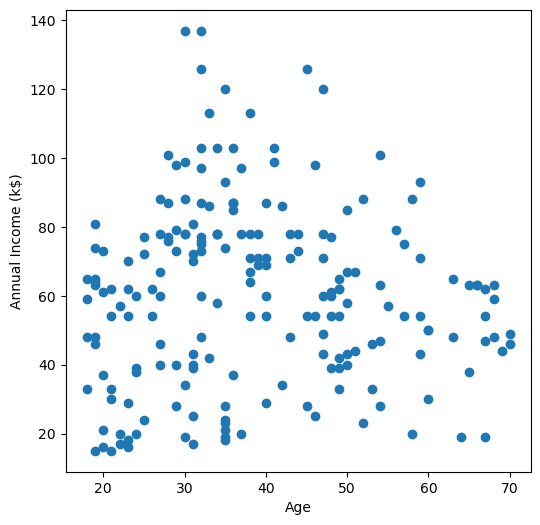

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [7]:
kmedoids = KMedoids(n_clusters=5, random_state=42)

In [8]:
kmedoids.fit(features)

KMedoids(n_clusters=5, random_state=42)

In [9]:
kmedoids.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       2, 3, 3, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 3, 2, 3, 3,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [10]:
kmedoids.cluster_centers_

array([[37., 97.],
       [25., 72.],
       [43., 71.],
       [54., 47.],
       [29., 28.]])

Text(0, 0.5, 'Annual Income (k$)')

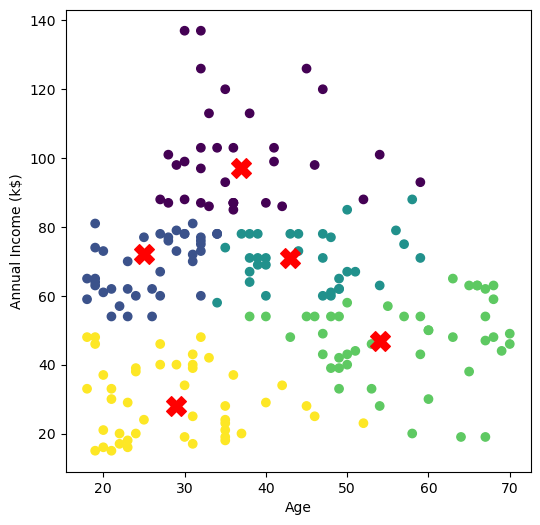

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=kmedoids.labels_)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])

In [15]:
df['Age'] = scaler.fit_transform(df[['Age']])

In [16]:
features = df[["Age", "Annual Income (k$)"]]
features

,Age,Annual Income (k$)
0,0.019231,0.000000
1,0.057692,0.000000
2,0.038462,0.008197
3,0.096154,0.008197
4,0.250000,0.016393
...,...,...
195,0.326923,0.860656
196,0.519231,0.909836
197,0.269231,0.909836
198,0.269231,1.000000


In [17]:
kmedoids = KMedoids(n_clusters=5, random_state=42)

In [18]:
kmedoids.fit(features)

KMedoids(n_clusters=5, random_state=42)

Text(0, 0.5, 'Annual Income (k$)')

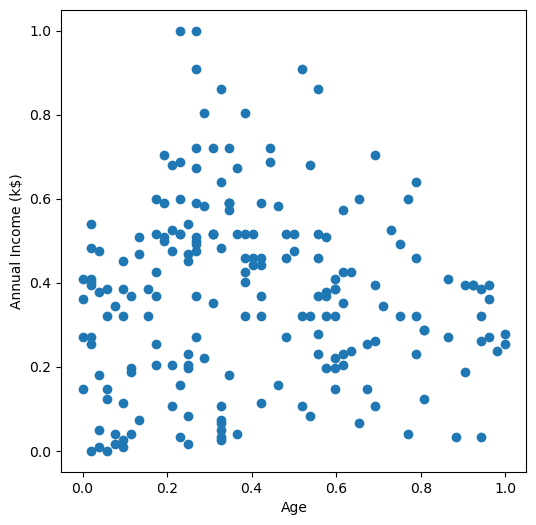

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [20]:
print(kmedoids.cluster_centers_)

[[0.21153846 0.10655738]
 [0.86538462 0.2704918 ]
 [0.21153846 0.47540984]
 [0.32692308 0.63934426]
 [0.57692308 0.36885246]]


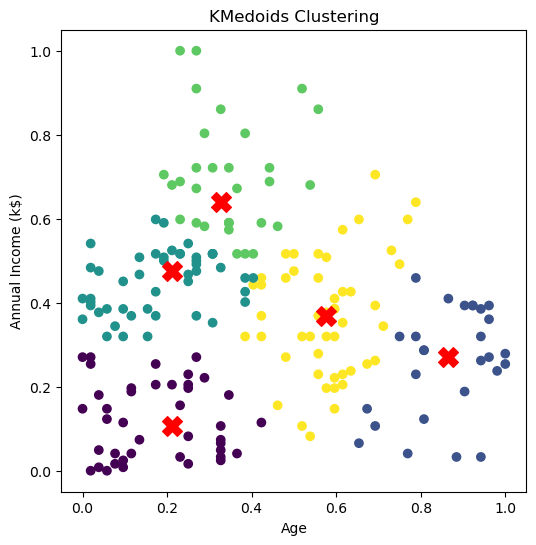

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=kmedoids.labels_)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('KMedoids Clustering')
plt.show()